In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
df = pd.read_csv('E:\My projects\Python Diwali\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv', encoding = 'unicode_escape')

In [13]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
# DATA CLEANING

In [15]:
df.drop( [ 'Status' , 'unnamed1' ] , axis = 1, inplace = True)

In [18]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [19]:
# Dropping null values

df.dropna(inplace = True)

In [20]:
df.shape

(11239, 13)

In [24]:
# change data type

df[ 'Amount' ] = df[ 'Amount' ].astype('int')

In [28]:
df[['Age' , 'Orders' , 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [29]:
# EXPLORING DATA

In [ ]:
# Gender

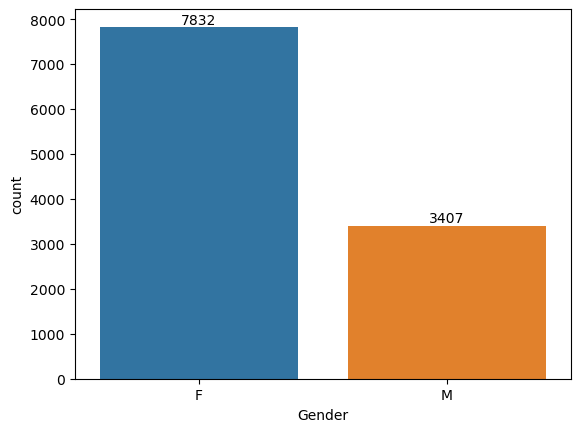

In [32]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

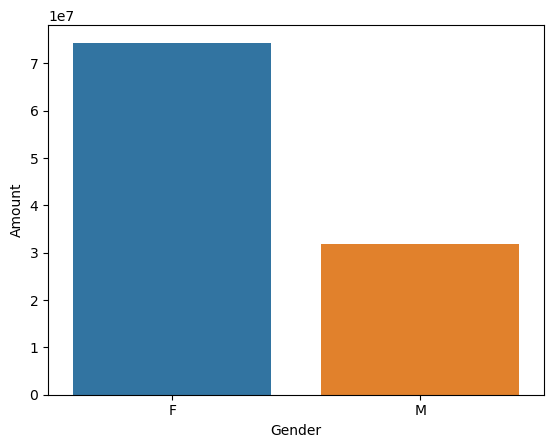

In [39]:
sales_gender = df.groupby(['Gender'] , as_index = False).sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Gender', y = 'Amount', data = sales_gender)

In [40]:
# AGE


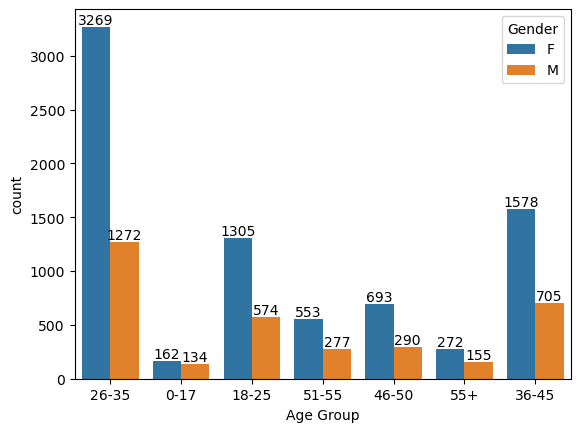

In [43]:
ax = sns.countplot(x = 'Age Group', hue ='Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

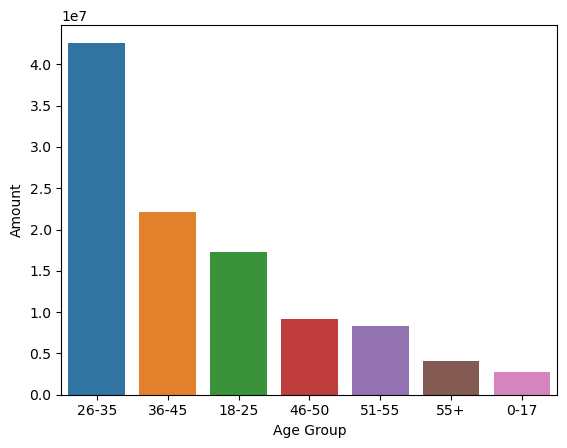

In [50]:
sales_age = df.groupby(['Age Group'] , as_index = False).sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

In [51]:
# STATE WISE SALES and ORDERS


<AxesSubplot:xlabel='State', ylabel='Orders'>

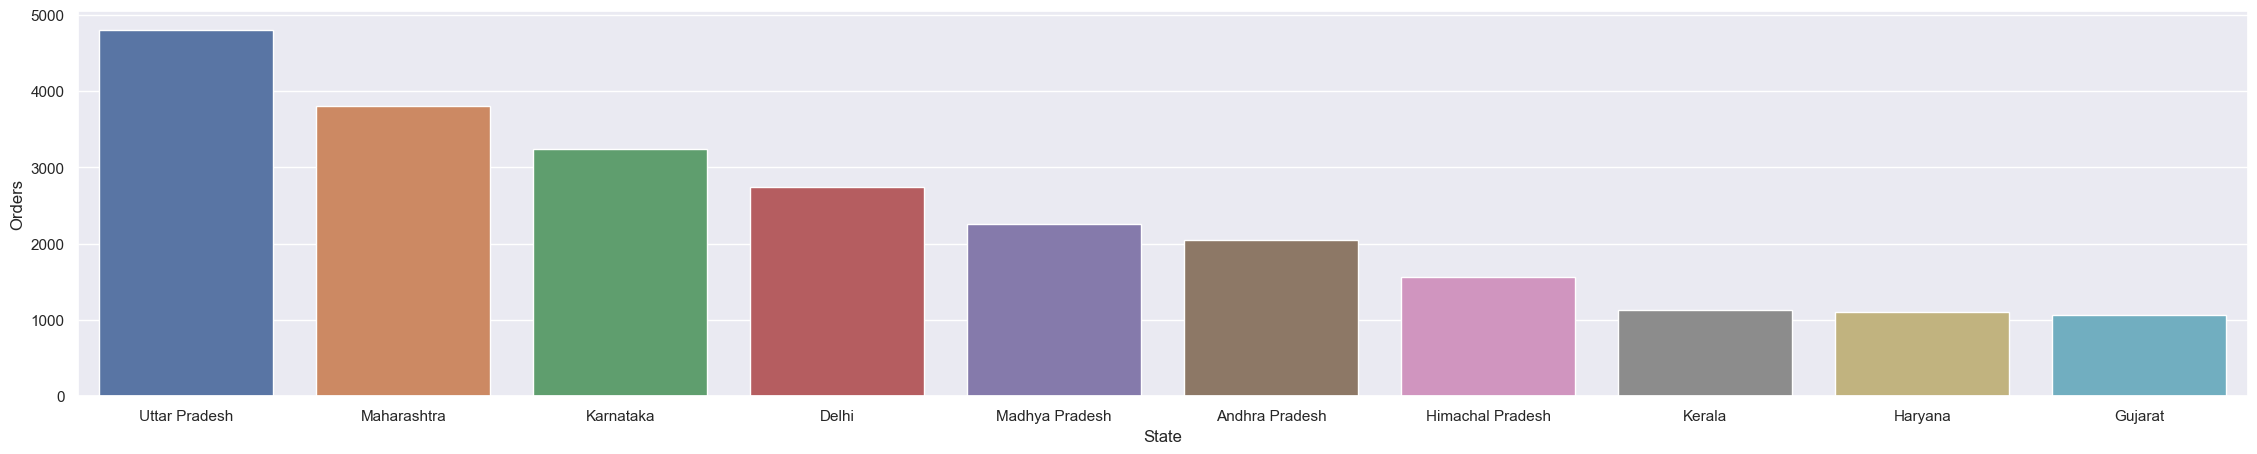

In [60]:
sales_state = df.groupby(['State'] , as_index = False).sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (28,5)})

sns.barplot(x = 'State', y = 'Orders', data =sales_state)

<AxesSubplot:xlabel='State', ylabel='Amount'>

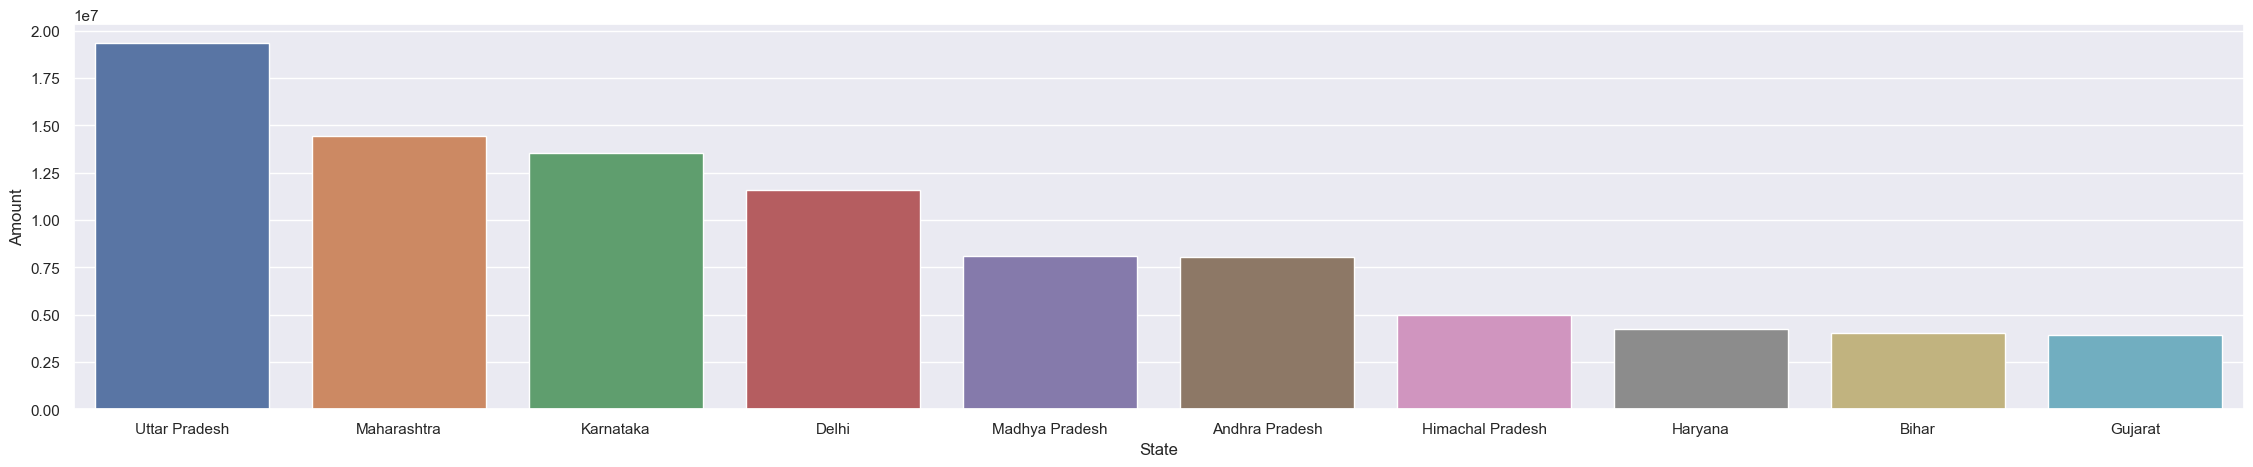

In [61]:
sales_state = df.groupby(['State'] , as_index = False).sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (28,5)})

sns.barplot(x = 'State', y = 'Amount', data =sales_state)

In [62]:
# MARITAL STATUS

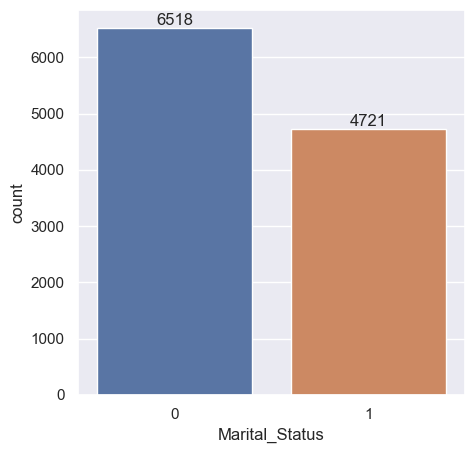

In [67]:
ax = sns.countplot(x = 'Marital_Status', data = df)

sns.set(rc = {'figure.figsize' : (7,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

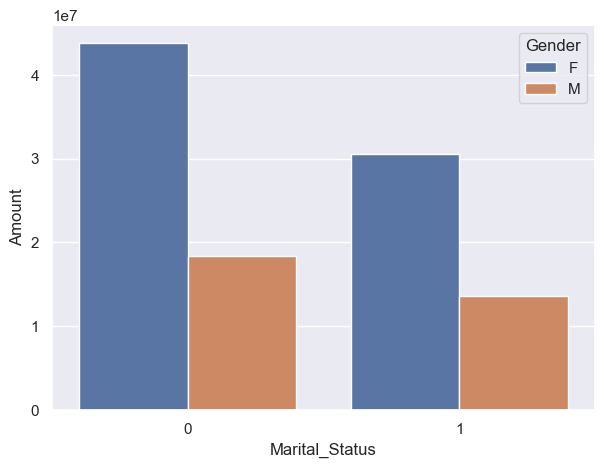

In [71]:
sales_state = df.groupby(['Marital_Status' , 'Gender'] , as_index = False).sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (7,5)})

sns.barplot(x = 'Marital_Status', y = 'Amount', data =sales_state , hue = 'Gender')

In [72]:
# OCCUPATION


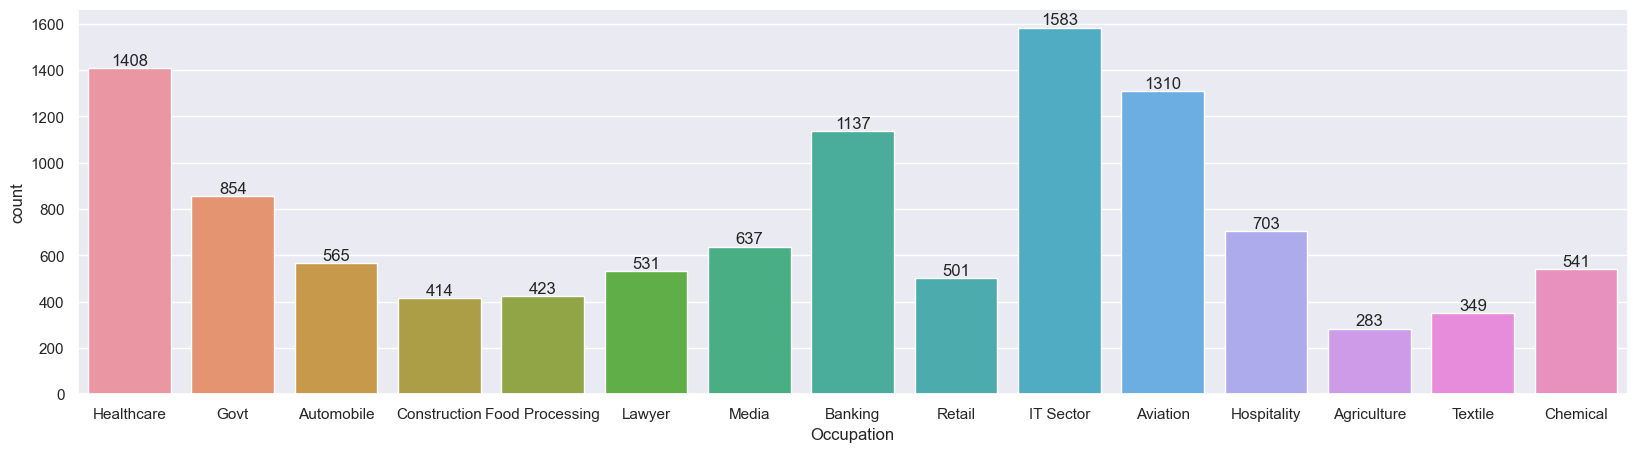

In [75]:
ax = sns.countplot(x = 'Occupation', data = df)

sns.set(rc = {'figure.figsize' : (20,10)})

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

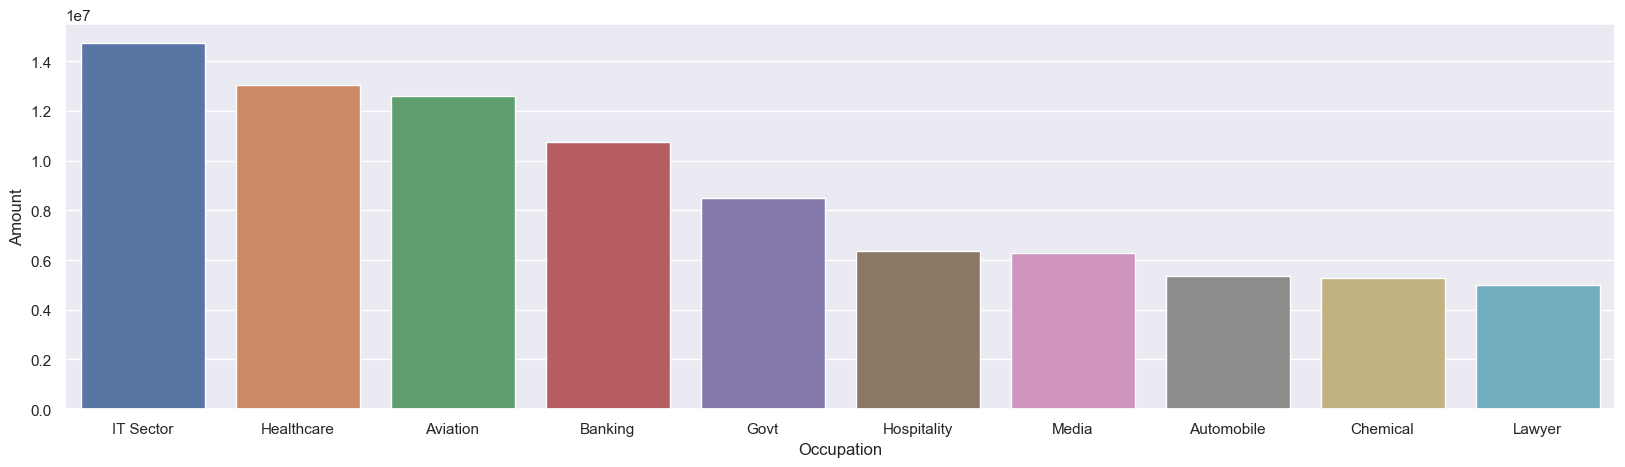

In [77]:
sales_state = df.groupby(['Occupation'] , as_index = False).sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (20,5)})

sns.barplot(x = 'Occupation', y = 'Amount', data =sales_state )

In [78]:
# PRODUCT CATEGORY


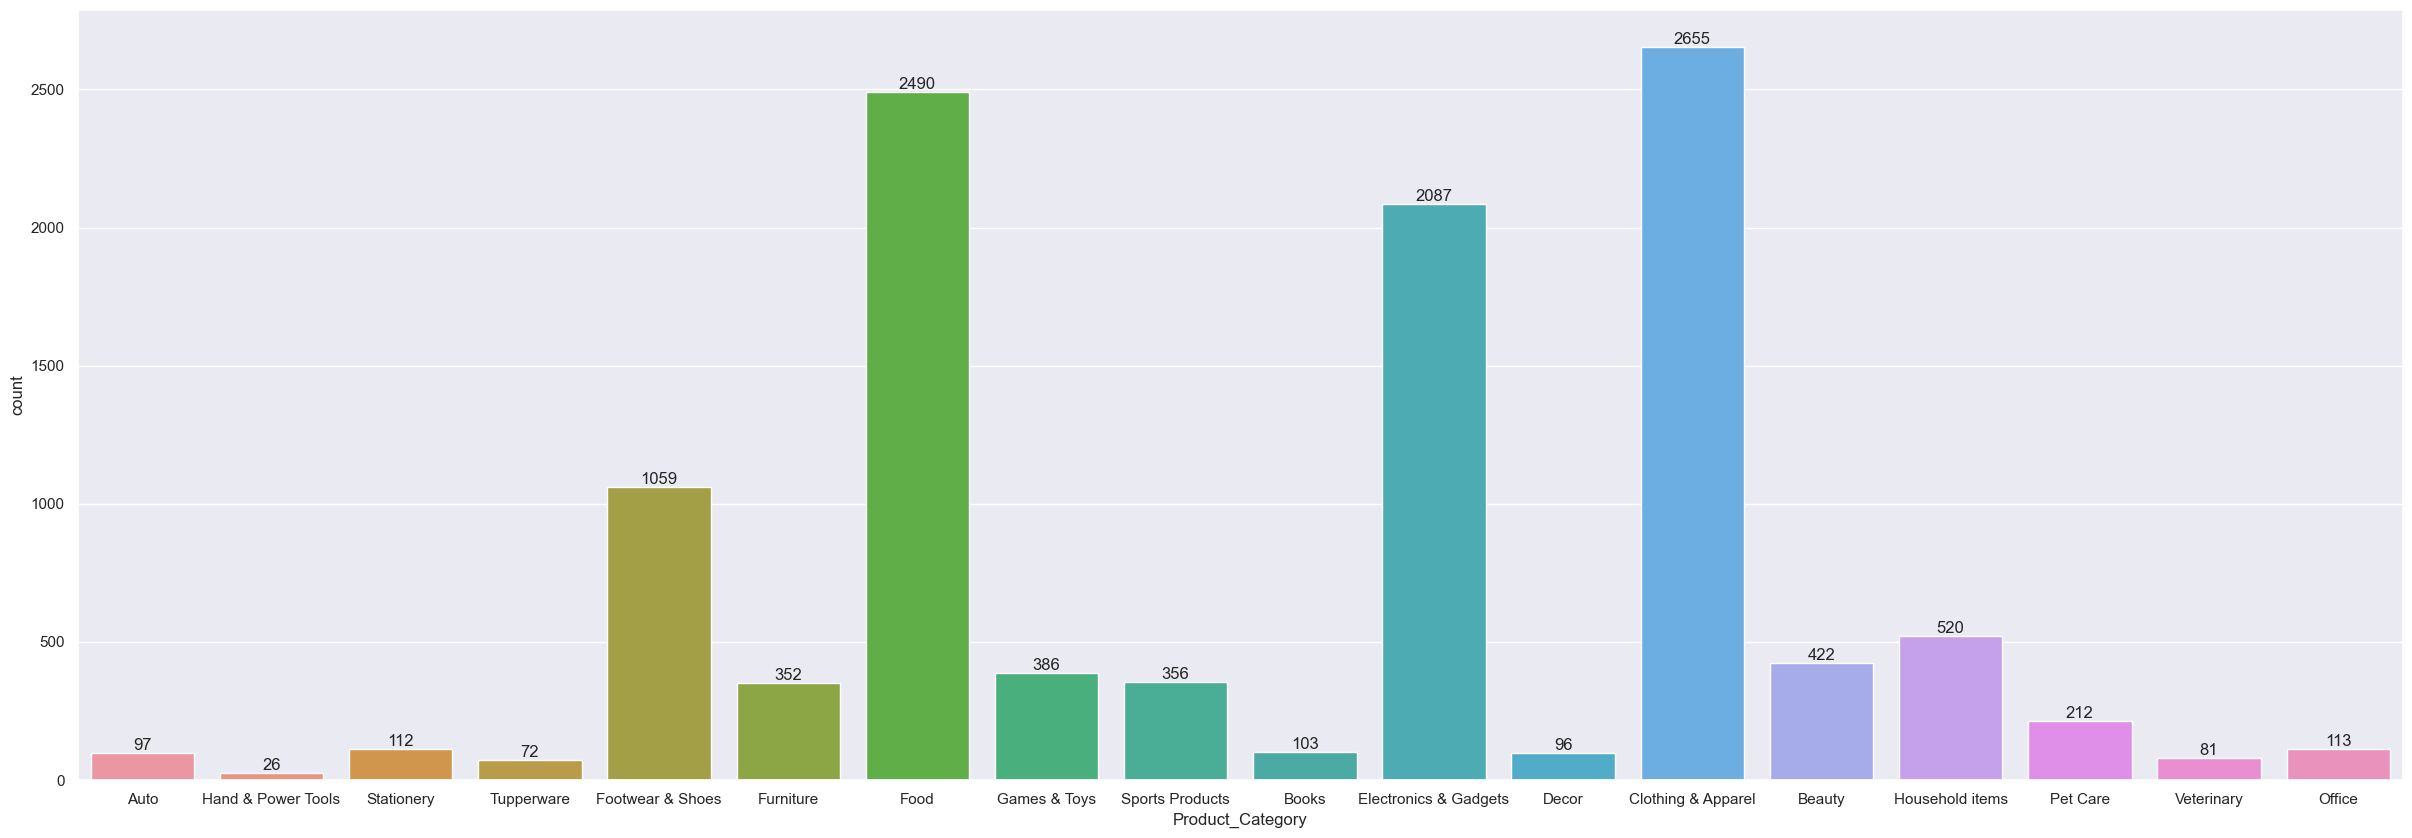

In [81]:
ax = sns.countplot(x = 'Product_Category', data = df)

sns.set(rc = {'figure.figsize' : (30,15)})

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

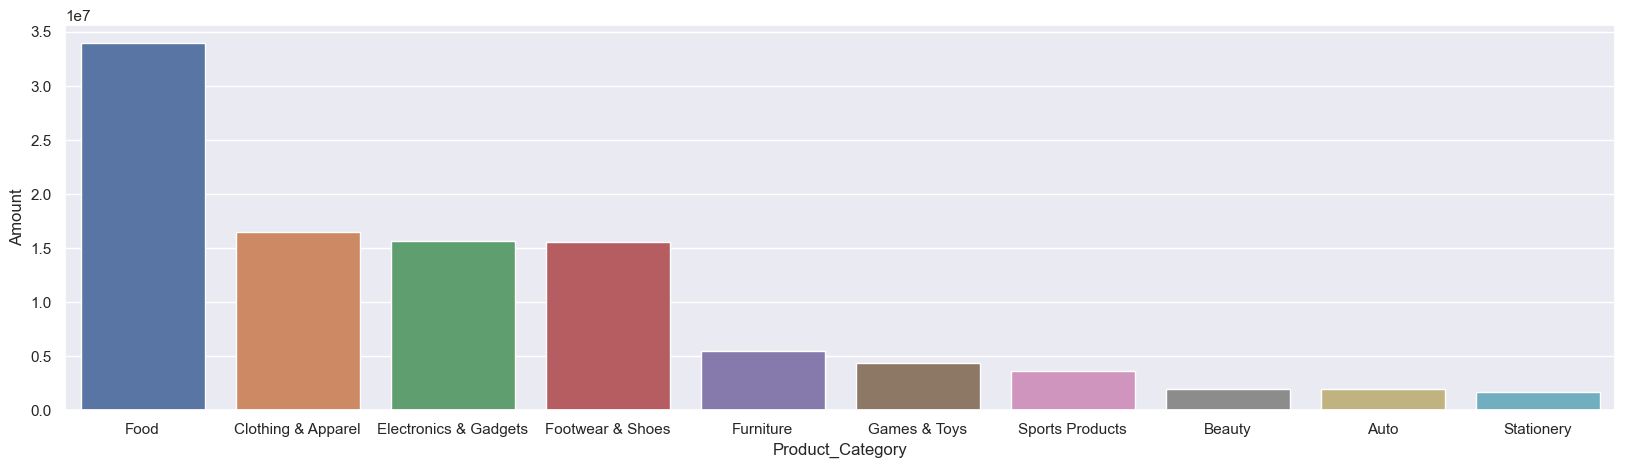

In [82]:
sales_state = df.groupby(['Product_Category'] , as_index = False).sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (20,5)})

sns.barplot(x = 'Product_Category', y = 'Amount', data =sales_state )

In [83]:
# TOP SELLING PRODUCTS

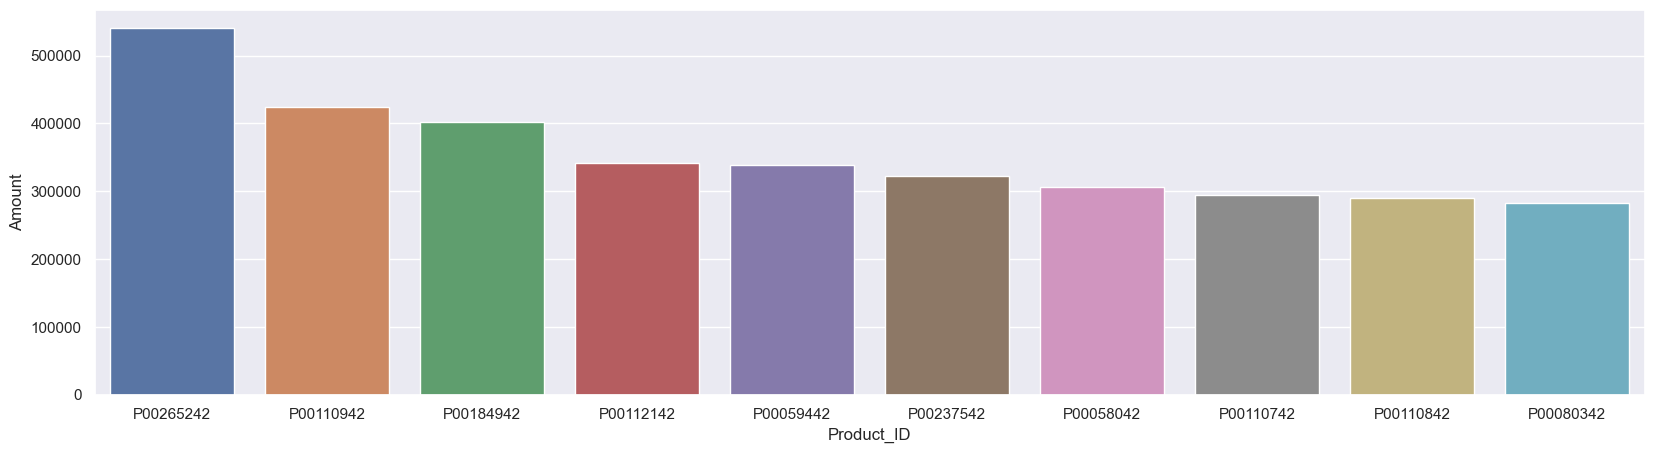

In [86]:
sales_state = df.groupby(['Product_ID'] , as_index = False).sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (20,5)})

sns.barplot(x = 'Product_ID', y = 'Amount', data =sales_state )




In [85]:
# KEY INSIGHTS

In [ ]:
# 1 - Women have more orders than men

# 2 - Age Group 26-35 has highest number of sales amount and  orders
     
# 3 - Uttar Pradesh has highest number of sales and orders

# 4 - Unmarried people are most active customers

# 5 - People working in IT Sector has spent most amount

# 6- Maximum amount was spent on Food and Clothing